In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-05-21 13:39:09.853200


<h1>Aikasarjojen kuvailua ja analysointia</h1>

Seuraavassa tarvitaan <b>pandas-datareader</b> -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan aika-akselin viimeistelyyn
import matplotlib.dates as mdates

# Tätä tarvitaan datan noutamiseksi Yahoon-palvelusta
# Varmista, että pandas-datareader on asennettu
import pandas_datareader.data as web

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

<h2>Datojen nouto</h2>

Elisan ja Telian kurssihistoriat voi noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran nimen Yahoossa.

In [3]:
elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2015-1-1', data_source = 'yahoo')

In [4]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,16.803356
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,16.595909
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,16.981169
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,16.914490
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,16.936720
...,...,...,...,...,...,...
2021-05-17,48.750000,48.169998,48.189999,48.590000,349848.0,48.590000
2021-05-18,48.709999,48.310001,48.590000,48.580002,311742.0,48.580002
2021-05-19,48.830002,48.330002,48.480000,48.730000,383323.0,48.730000


In [5]:
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.3600,5.2850,5.340,5.3050,1039894.0,0.050916
2015-01-05,5.3000,5.2050,5.290,5.2050,929121.0,0.049956
2015-01-07,5.3000,5.2200,5.240,5.2450,860595.0,0.050340
2015-01-08,5.4100,5.2600,5.260,5.4050,1001285.0,0.051876
2015-01-09,5.4200,5.2900,5.400,5.2950,917754.0,0.050820
...,...,...,...,...,...,...
2021-05-17,3.6435,3.6060,3.617,3.6380,1048405.0,3.638000
2021-05-18,3.6830,3.6270,3.641,3.6790,1357150.0,3.679000
2021-05-19,3.6845,3.6305,3.660,3.6325,992120.0,3.632500


<h2>Viivakaavioita</h2>

<AxesSubplot:xlabel='Date'>

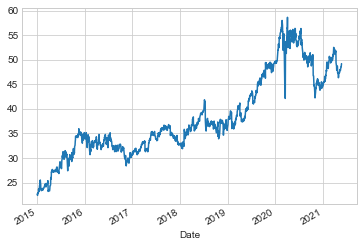

In [6]:
elisa['Close'].plot()

<AxesSubplot:xlabel='Date'>

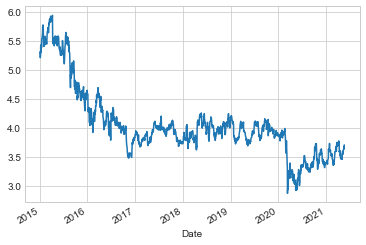

In [7]:
telia['Close'].plot()

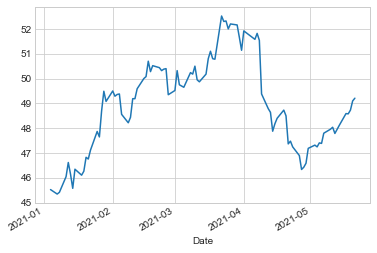

In [8]:
# Vuoden 2021 alusta
elisa['Close']['2021':].plot()

# Tämä viimeistelee aika-akselin
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

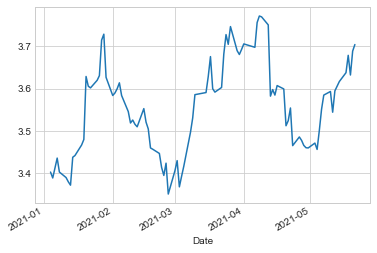

In [9]:
telia['Close']['2021'].plot()

# Tämä viimeistelee aika-akselin
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

<h2>Aggregointi</h2>

<b>resample()</b> aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample()-toiminnon parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<AxesSubplot:xlabel='Date'>

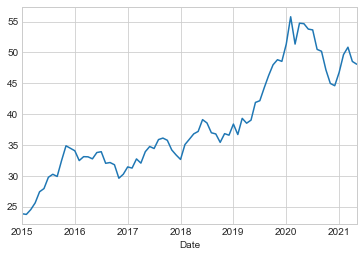

In [10]:
# Kuukausittaiset keskiarvohinnat
elisa['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

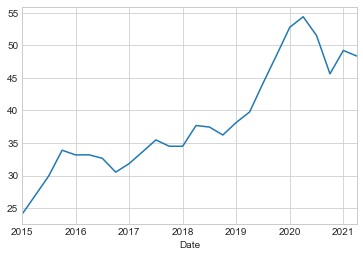

In [11]:
# Vuosineljännesten keskiarvohinnat
elisa['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

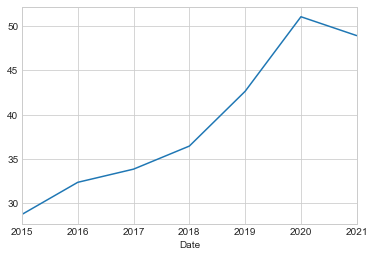

In [12]:
# Vuosien keskiarvohinnat
elisa['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

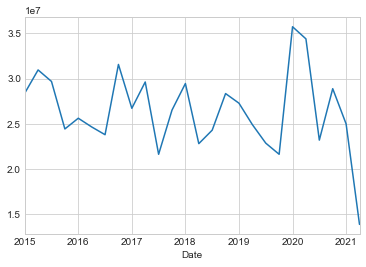

In [13]:
# Vaihdon määrä osakkeiden lukumääränä vuosineljänneksittäin
elisa['Volume'].resample('Q').sum().plot()

<h2>Liukuvia keskiarvoja</h2>

Liukuvilla keskiarvoilla tasoitetaan yksittäisiin ajankohtiin liittyviä satunnaisia piikkejä.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.

<AxesSubplot:xlabel='Date'>

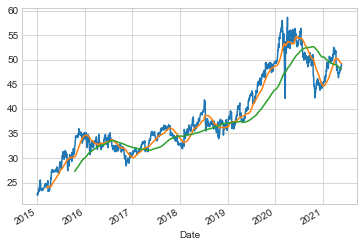

In [14]:
elisa['Close'].plot()

# Lisätään viivakaavioon 50 päivän ja 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()
elisa['Close'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

Muutosprosentit on kätevää laskea <b>pct_change()</b>-funktiolla.

In [15]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

In [16]:
# Yhdistän Elisan ja Telian muutosprosentit samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin muutosprosenteissakin on puuttuvia arvoja
# Ne voin korvata muutosprosentilla 0 käyttäen fillna-toimintoa
muutokset = muutokset.fillna(0)

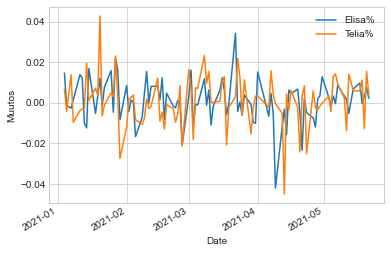

In [17]:
# Muutokset vuoden 2021 alusta
muutokset['2021':].plot()

plt.ylabel('Muutos')

# Tämä viimeistelee aika-akselin
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

In [18]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1603.000000,1603.000000
mean,0.000594,-0.000121
std,0.014878,0.014329
min,-0.092226,-0.134499
25%,-0.006390,-0.006940
50%,0.000776,-0.000144
75%,0.007895,0.007424
max,0.164016,0.109976


In [19]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%']) > 0.05) | (abs(muutokset['Telia%']) > 0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [20]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,319.0,0.001535,0.013256,-0.055172,-0.005171,0.001071,0.008502,0.057805
1,325.0,0.001018,0.015820,-0.038976,-0.006930,0.000307,0.007671,0.164016
2,326.0,0.001003,0.013242,-0.053899,-0.005693,0.000349,0.008223,0.059656
3,320.0,-0.000056,0.015477,-0.084077,-0.007006,0.000468,0.007549,0.068757
4,313.0,-0.000569,0.016340,-0.092226,-0.006320,0.001055,0.007607,0.061796


In [21]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,319.0,-0.000016,0.014459,-0.079728,-0.007013,-0.000501,0.007571,0.041424
1,325.0,0.000742,0.014625,-0.046268,-0.006526,-0.000496,0.007353,0.109976
2,326.0,0.000230,0.012572,-0.061963,-0.006058,0.000000,0.008420,0.042816
3,320.0,-0.001324,0.015826,-0.134499,-0.007874,-0.000122,0.006745,0.051014
4,313.0,-0.000259,0.013999,-0.066333,-0.007194,0.000000,0.007234,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [22]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.487743
Telia%,0.487743,1.000000


<AxesSubplot:xlabel='Elisa%', ylabel='Telia%'>

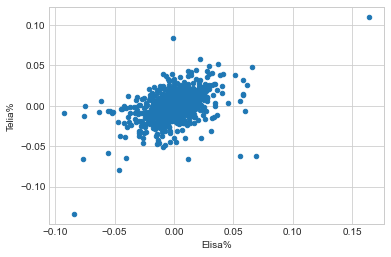

In [23]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x = 'Elisa%', y = 'Telia%')

<AxesSubplot:xlabel='Date'>

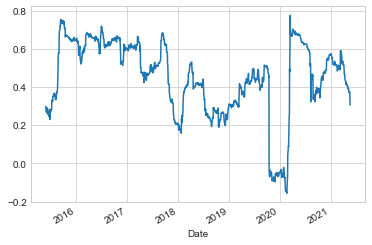

In [24]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana (std()) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

<AxesSubplot:xlabel='Date'>

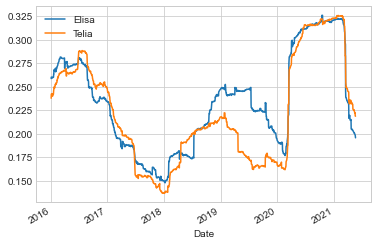

In [25]:
# 252 päivän liukuva volatiliteetti
(muutokset['Elisa%'].rolling(252).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(252).std() * (252**0.5)).plot(label = 'Telia', legend = True)

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

(2.0, 6.0)

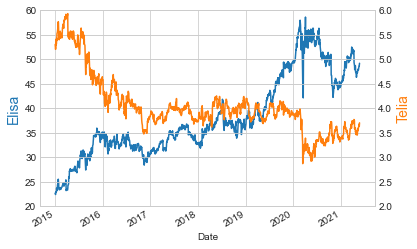

In [26]:
# Viivakaavio Elisan päätöshinnoista (axe)
axe = elisa['Close'].plot(color = 'C0')

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color = 'C0', fontsize = 14)

# Elisan arvoakselin skaalaus
plt.ylim(20, 60)

# Luon Telialle toisen axes-olion (axt), jolla on yhteinen x-akseli axe-olion kanssa
axt = axe.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax = axt, color = 'C1')

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color = 'C1', fontsize = 14)

# Telian arvoakselin skaalaus
plt.ylim(2, 6)